# 使用するモジュール
- pandas:データフレームを扱うモジュール
- numpy:行列を扱うモジュール
- scipy:科学計算を扱うモジュール
- matplotlib:データの可視化モジュール
- searborn:matplotlibの強化モジュール
- sci-kit learn:機械学習を扱うモジュール

# アジェンダ
- 基本的な集計
- 統計的な確認
- 多変量解析
- 機械学習

# 機械学習のプロセス

# 機械学習の種類

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# 今回使うデータ
- 某小売店で購買内容を基に購買者が妊婦か否かを判断したデータ

参考
[DataSmart]()
[]()


In [4]:
retail = pd.read_csv("retail.csv")

In [5]:
retail.head(5)

,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
Implied Gender            1000 non-null object
Home/Apt/ PO Box          1000 non-null object
Pregnancy Test            1000 non-null int64
Birth Control             1000 non-null int64
Feminine Hygiene          1000 non-null int64
Folic Acid                1000 non-null int64
Prenatal Vitamins         1000 non-null int64
Prenatal Yoga             1000 non-null int64
Body Pillow               1000 non-null int64
Ginger Ale                1000 non-null int64
Sea Bands                 1000 non-null int64
Stopped buying ciggies    1000 non-null int64
Cigarettes                1000 non-null int64
Smoking Cessation         1000 non-null int64
Stopped buying wine       1000 non-null int64
Wine                      1000 non-null int64
Maternity Clothes         1000 non-null int64
PREGNANT                  1000 non-null int64
dtypes: int64(16), object(2)
memory usage: 148.4+ KB


In [8]:
print retail["Implied Gender"].value_counts()

F    495
M    401
U    104
Name: Implied Gender, dtype: int64


# データの集計
- 生データ=>集計を行って、データの概要をつかむ
- `group by`:行の集計
- `pivot_table`:縦持ちデータ=>横持ちデータへの集計

In [11]:
retail.ix[:,["Implied Gender","PREGNANT","Birth Control"]].pivot_table(index="Implied Gender",columns= "PREGNANT",values="Birth Control",aggfunc="count")

PREGNANT,0,1
Implied Gender,,
F,226,269
M,228,173
U,46,58


# 検定で確認
- カイ二乗検定
- 独立性があるかの確認
- 帰無仮説:独立していない,対立仮説:独立している

In [12]:
from scipy import stats
chi_dat = np.array([[226,269],[228,173]])
squared,p,dof,ef = stats.chi2_contingency(chi_dat)
print p #p値
print ef #期待度数

0.00108495922782
[[ 250.81473214  244.18526786]
 [ 203.18526786  197.81473214]]


In [13]:
# =>性別による影響がある

In [59]:
# 次元の話と線形分離

# 多変量解析
- 変数(次元):行列の列に意味をもたせたもの
- 行方向のデータに属性を付与する
- これのデータの扱いを理論化しているのが多変量解析(とそれ用のデータ分析)
(人間の認知能力だと把握に限界がある)

参考
[ワインの話]()

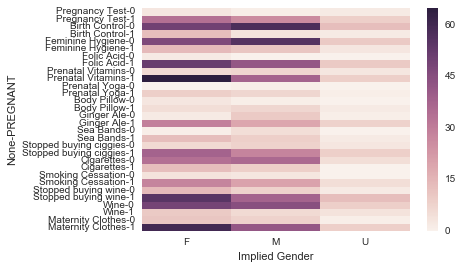

In [14]:
sns.heatmap(retail.pivot_table(index = "Implied Gender",columns="PREGNANT",aggfunc="sum").T)

## 主成分分析
- 多次元のデータをより少ない次元に圧縮する手法

In [15]:
from sklearn.decomposition import PCA
pca_dat = retail.ix[:,2:17]
pca_mdl = PCA(2)

In [16]:
pca_dat.head()

,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [17]:
pca_res = pca_mdl.fit_transform(pca_dat)

In [18]:
pca_res[:5]
# 二次元に圧縮された

array([[-0.4326589 ,  0.13894602],
       [-0.4326589 ,  0.13894602],
       [-0.16972018,  0.09554028],
       [-0.02329614,  0.03590629],
       [-0.36056148,  0.22265811]])

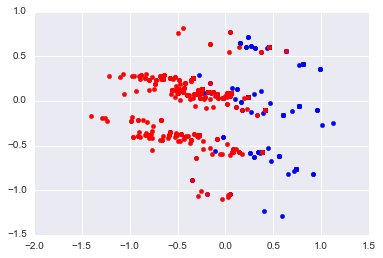

In [19]:
pca_df = pd.DataFrame(pca_res)
pca_df["PREGNANT"] = retail["PREGNANT"]
col = ["blue","red"]
for i in range(2):
    tmp = pca_df[pca_df.PREGNANT==i]
    plt.scatter(x = tmp[0],y=tmp[1],color=col[i])
# 横軸が妊婦が否かであることが分かる

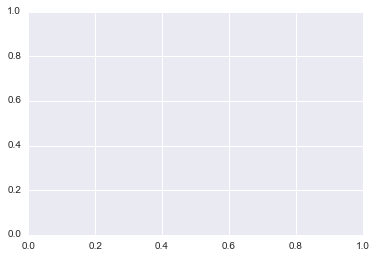

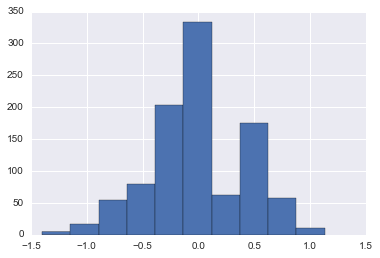

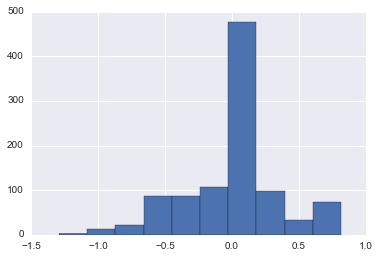

In [20]:

plt.subplot(1,1,1)
for i in range(2):
    fig = plt.figure()
    pca_df[i].hist()

## 階層クラスタリング
- 次元を基に、類似度を把握する手法
- 多次元空間にプロットされたデータの距離を基に似ているデータを集めう
- 階層ありと階層なしがあるが今回は階層あり

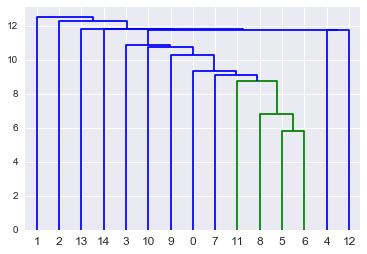

In [21]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,dendrogram

dist = pdist(np.array(pca_dat.T))
cls_result = linkage(dist)
dendrogram(cls_result)
plt.show()

In [22]:
for i , n in enumerate(pca_dat.columns):
    print  i,n

0 Pregnancy Test
1 Birth Control
2 Feminine Hygiene
3 Folic Acid
4 Prenatal Vitamins
5 Prenatal Yoga
6 Body Pillow
7 Ginger Ale
8 Sea Bands
9 Stopped buying ciggies
10 Cigarettes
11 Smoking Cessation
12 Stopped buying wine
13 Wine
14 Maternity Clothes


## MDS
- データを圧縮した次元にプロットする
- その位置によってデータの近さを確認出来る
- 主成分分析はあくまで次元の圧縮が目的だが、MDSは圧縮した次元にプロットすることが目的

In [23]:
from sklearn.manifold import MDS
mds_mdl = MDS(n_components=2,dissimilarity="euclidean",random_state=1)

In [24]:
mds_res = mds_mdl.fit_transform(pca_dat.T)

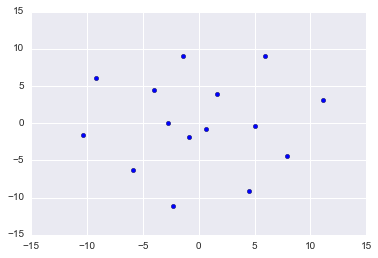

In [25]:
mds_df = pd.DataFrame(mds_res)
plt.scatter(x=mds_df[0],y=mds_df[1])

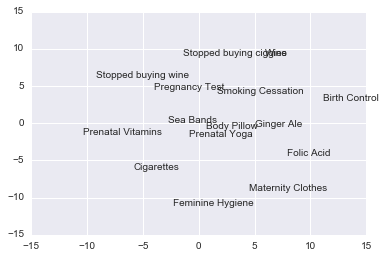

In [26]:
fig = plt.figure()
plt.xlim(-15,15)
plt.ylim(-15,15)
for lbl,pos in zip(pca_dat.columns,mds_res):
    plt.text(pos[0],pos[1],lbl)
    

## 回帰分析
- 各変量が結果にどのくらいの影響をあたえるかを数式化する方法
- 目的変数の種類や、分布の仮定によって使用する分析名がかわる
- 今回は目的変数が二値なのでロジスティック回帰を使う


In [27]:
from sklearn.linear_model import LogisticRegression
m_logit_mdl = LogisticRegression()

In [28]:
m_dat = retail[retail["Implied Gender"] != "F"]
m_dat.head()

,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,M,H,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [29]:
m_logit_mdl.fit(X=m_dat.ix[:,2:17],y=m_dat.PREGNANT)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
m_coef= pd.DataFrame(m_logit_mdl.coef_).T
m_coef.index=m_dat.columns[2:17]
m_coef

,0
Pregnancy Test,1.978629
Birth Control,-2.223912
Feminine Hygiene,-1.569618
Folic Acid,2.913971
Prenatal Vitamins,1.806862
Prenatal Yoga,1.249674
Body Pillow,0.924642
Ginger Ale,0.885529
Sea Bands,0.682928
Stopped buying ciggies,0.965379


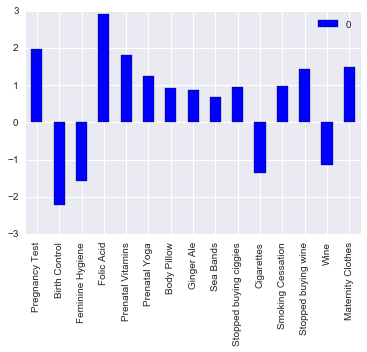

In [31]:
m_coef.plot(kind="bar")

In [32]:
f_logit_mdl = LogisticRegression()
f_dat = retail[retail["Implied Gender"] != "M"]
f_logit_mdl.fit(X=f_dat.ix[:,2:17],y=f_dat.PREGNANT)
f_coef= pd.DataFrame(f_logit_mdl.coef_).T
f_coef.index=f_dat.columns[2:17]
f_coef

,0
Pregnancy Test,1.213938
Birth Control,-1.504180
Feminine Hygiene,-1.473262
Folic Acid,2.184776
Prenatal Vitamins,1.895484
Prenatal Yoga,0.935001
Body Pillow,0.463200
Ginger Ale,2.090933
Sea Bands,1.051877
Stopped buying ciggies,1.123330


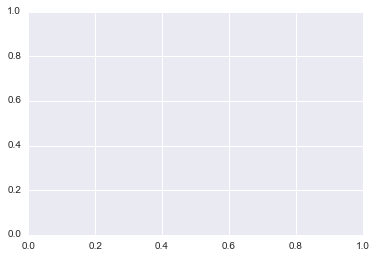

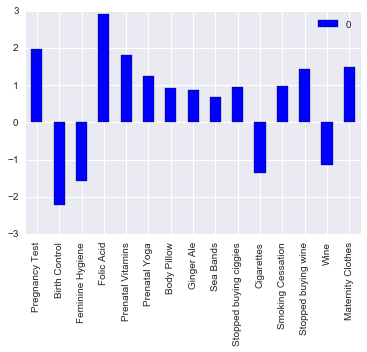

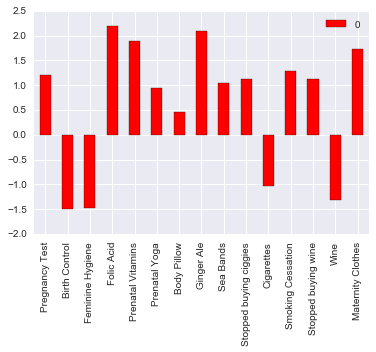

In [33]:
plt.subplot()

m_coef.plot(kind="bar",color="blue")
f_coef.plot(kind="bar",color="red")

In [34]:
from sklearn.ensemble import RandomForestClassifier
m_rf_mdl = RandomForestClassifier()
m_rf_mdl.fit(m_dat.ix[:,2:17],m_dat.PREGNANT)

print m_rf_mdl.score(m_dat.ix[:,2:17],m_dat.PREGNANT)


0.867326732673


# 機械学習
- 多変量のデータを説明変数に目的変数を決定するモデルを作成する
- データを区分する法則を最適化手法で見つけてモデル化する手法群
- 統計的な手法や多変量解析が各次元の意味合いを重視するのに対し、機械学習は結果が十分に分類されるか、が目的になる

In [35]:
f_rf_mdl = RandomForestClassifier()
f_rf_mdl.fit(f_dat.ix[:,2:17],f_dat.PREGNANT)

print f_rf_mdl.score(f_dat.ix[:,2:17],f_dat.PREGNANT)

0.838063439065


In [36]:
print m_rf_mdl.score(retail.ix[:,2:17],retail.PREGNANT)
print f_rf_mdl.score(retail.ix[:,2:17],retail.PREGNANT)

0.839
0.834


# 機械学習の評価と向上方法

In [37]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(m_dat.ix[:,2:17],m_dat.PREGNANT, test_size=0.4, random_state=0)
m_rf_mdl.fit(X_train, y_train)
print m_rf_mdl.score(X_test, y_test)


0.80198019802


In [38]:
scores = cross_validation.cross_val_score(m_rf_mdl,m_dat.ix[:,2:17],m_dat.PREGNANT, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.09)


In [39]:
scores = cross_validation.cross_val_score(f_rf_mdl,f_dat.ix[:,12:17],f_dat.PREGNANT, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.07)


In [62]:
print max(tmp)
print min(tmp)
print np.mean(tmp)

0.833713423831
0.764298642534
0.807799597788


In [ ]:
# ↑step wise

In [2]:
# grid search + cross validation

In [44]:
params = {
    'n_estimators':[i for i in range(1,151,30)],
    'max_features':[i for i in range(1,16,3)],
    'random_state':[0],
    'n_jobs':[1],
    'min_samples_split':[i for i in range(1,50,10)],
    'max_depth':[i for i in range(1,50,10)]
    
}

In [45]:
from sklearn.grid_search import GridSearchCV
f_rf = GridSearchCV(RandomForestClassifier(),params)
f_rf.fit(m_dat.ix[:,2:17],m_dat.PREGNANT)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_jobs': [1], 'n_estimators': [1, 31, 61, 91, 121], 'min_samples_split': [1, 11, 21, 31, 41], 'random_state': [0], 'max_features': [1, 4, 7, 10, 13], 'max_depth': [1, 11, 21, 31, 41]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [55]:

f_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=21,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
mdl = RandomForestClassifier(f_rf.best_estimator_)

In [57]:
f_rf.best_estimator_.fit(X=m_dat.ix[:,2:17],y=m_dat.PREGNANT)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=21,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
f_rf.best_estimator_.score(X=m_dat.ix[:,2:17],y=m_dat.PREGNANT)

0.85742574257425741

In [118]:
res = m_rf_mdl.predict([ [0,1,1,1,0,0]+[0 for i in range(9)] ])
res

array([1])

In [100]:
f_logit_mdl.predict([ [0,1,1,1]+[0 for i in range(11)] ])

array([0])

In [ ]:
# mdlの保存

In [120]:
import pickle
with open("mdl.pcl","wb") as f:
    pickle.dump(m_rf_mdl,f)

In [122]:
with open("mdl.pcl","rb") as f:
    cls = pickle.load(f)
cls.predict([[0,1,1,1]+[0 for i in range(11)] ])

array([1])